### Datos

In [90]:
%load_ext autoreload
%autoreload 2
from util import ReadData,LSTMClass,ModificacionYLimpiezaDeDataFrames,Graficos
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm._tqdm_notebook import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import optimizers
import os
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(rc={'figure.figsize':(12,10)},style='darkgrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
Datos = ReadData()

In [92]:
DatosFalabella = Datos.GetDataFromYahoo('FALABELLA.SN','2000-07-01','2019-12-15','1d')

[*********************100%***********************]  1 of 1 completed


### El formato de los datos debe ser de esta forma

In [93]:
DatosFalabella.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-07-03,509.783997,510.776001,509.783997,509.783997,459.475433,28332
2000-07-04,509.783997,509.783997,509.783997,509.783997,459.475433,51220
2000-07-05,505.816986,508.791992,505.816986,505.816986,455.899841,114539
2000-07-06,505.816986,505.816986,505.807007,505.816986,455.899841,114741
2000-07-07,505.816986,505.816986,505.816986,505.816986,455.899841,93164


### Modelo LSTM

#### Modelo LSTM Para Falabella

Text(0.5, 1.0, 'VolFalabella')

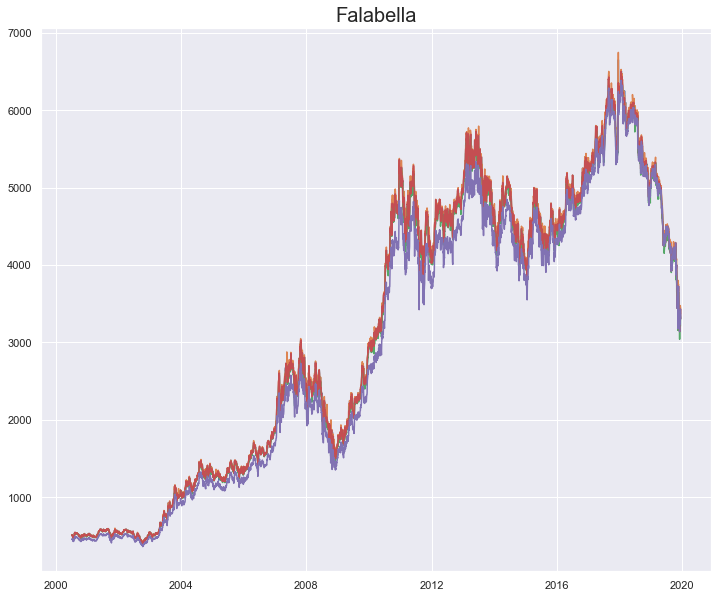

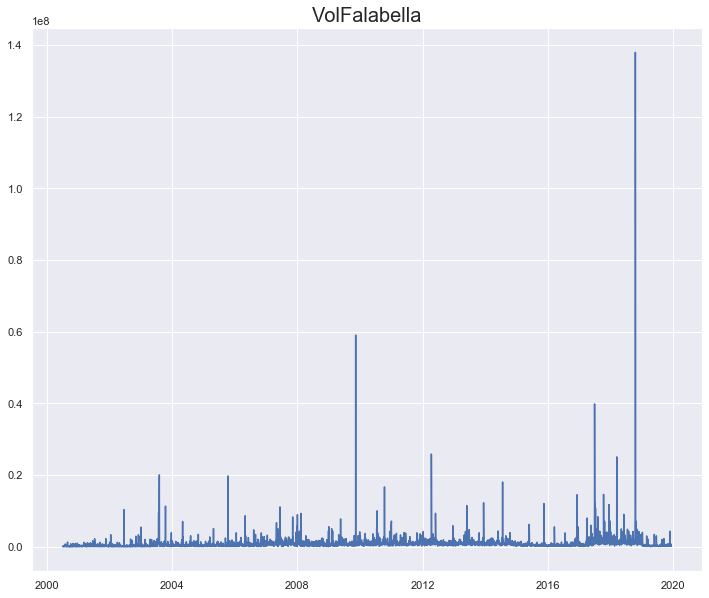

In [94]:
plt.plot(DatosFalabella[['Open','High','Low','Close','Adj Close']])
plt.title('Falabella',fontsize=20)
plt.figure()
plt.plot(DatosFalabella['Volume'])
plt.title('VolFalabella',fontsize=20)

#### Inicializa el modelo

In [95]:
# Base,Batch_size,epochs,lr,time_steps,MinMaxscaler
lstm = LSTMClass(DatosFalabella,20,50,0.001,10,MinMaxScaler())

#### Separa Train Test

In [96]:
m_train,m_test = lstm.Train_Test(['Open','High','Low','Close','Volume','Adj Close'],
                                 0.99,True)

In [97]:
print(m_train.shape,m_test.shape)

(4882, 6) (50, 6)


In [98]:
x_t,y_t,x_val,y_val = lstm.SplitTrainValTest(m_train,m_test,5)

Train size (4872, 10, 6) (4872,)
Test size (40, 10, 6) (40,)


(4860, 10, 6)
(4860,)
Model not found
Building model...
checking if GPU available ['/job:localhost/replica:0/task:0/device:GPU:0']
Train on 4860 samples, validate on 40 samples
Epoch 1/50
 - 5s - loss: 0.0040 - val_loss: 0.0027
Epoch 2/50
 - 5s - loss: 0.0037 - val_loss: 0.0041
Epoch 3/50
 - 5s - loss: 0.0032 - val_loss: 0.0048
Epoch 4/50
 - 5s - loss: 0.0028 - val_loss: 0.0031
Epoch 5/50
 - 5s - loss: 0.0024 - val_loss: 0.0029
Epoch 6/50
 - 5s - loss: 0.0021 - val_loss: 0.0025
Epoch 7/50
 - 5s - loss: 0.0017 - val_loss: 0.0047
Epoch 8/50
 - 5s - loss: 0.0015 - val_loss: 0.0040
Epoch 9/50
 - 5s - loss: 0.0015 - val_loss: 8.2650e-04
Epoch 10/50
 - 5s - loss: 0.0013 - val_loss: 8.9077e-04
Epoch 11/50
 - 5s - loss: 0.0012 - val_loss: 0.0019
Epoch 12/50
 - 5s - loss: 0.0012 - val_loss: 0.0013
Epoch 13/50
 - 5s - loss: 0.0011 - val_loss: 0.0019
Epoch 14/50
 - 5s - loss: 0.0011 - val_loss: 0.0011
Epoch 15/50
 - 5s - loss: 0.0010 - val_loss: 6.8141e-04
Epoch 16/50
 - 5s - loss: 0.0010 - val_l

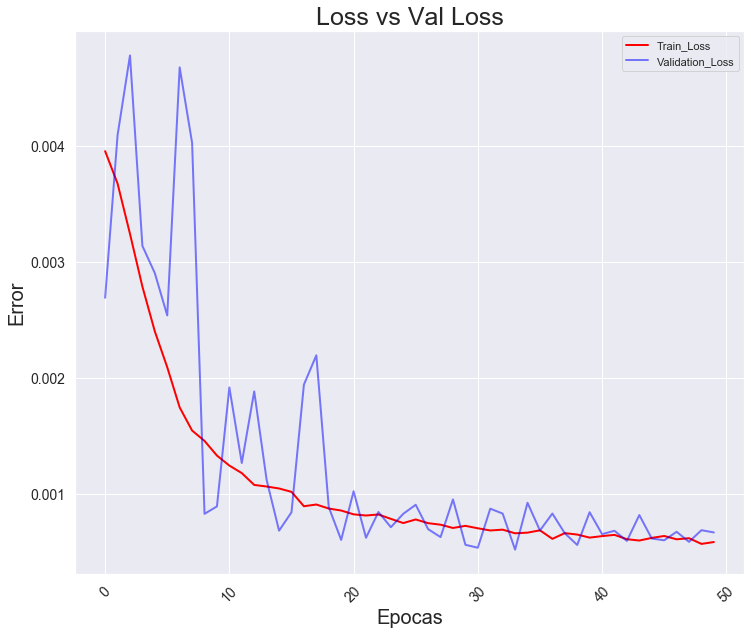

In [99]:
modelo = lstm.TrainModel(x_t,y_t,x_val,y_val,
                        100,0.3,'C:/Users/gasto/OneDrive/Trabajo2/lstm_model.h5')

Error is 0.0005481709505110438 (40,) (40,)


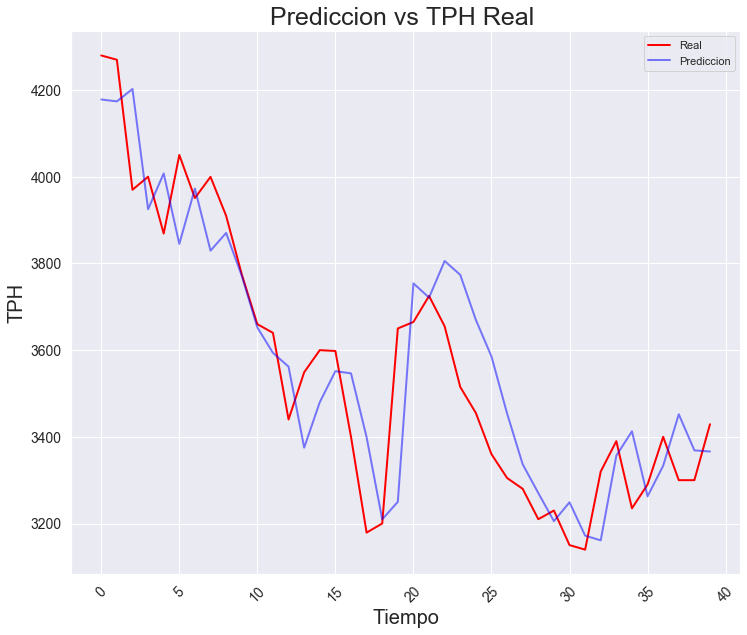

In [100]:
Pred = lstm.Prediction(modelo,x_val,y_val)

### Falta testear en un nuevo test set

In [120]:
lstm = LSTMClass(DatosFalabella,20,10,0.001,10,MinMaxScaler())

In [121]:
DatosFalabellaNuevo = Datos.GetDataFromYahoo('FALABELLA.SN','2019-11-28','2020-01-15','1d')

[*********************100%***********************]  1 of 1 completed


In [122]:
DatosFalabellaNuevo.shape

(32, 6)

In [123]:
DatosFalabellaNuevo = DatosFalabellaNuevo.iloc[(DatosFalabellaNuevo.shape[0])%(lstm.batch_size+lstm.time_steps):,]

In [124]:
DatosFalabellaNuevo.shape

(30, 6)

Text(0.5, 1.0, 'VolFalabella')

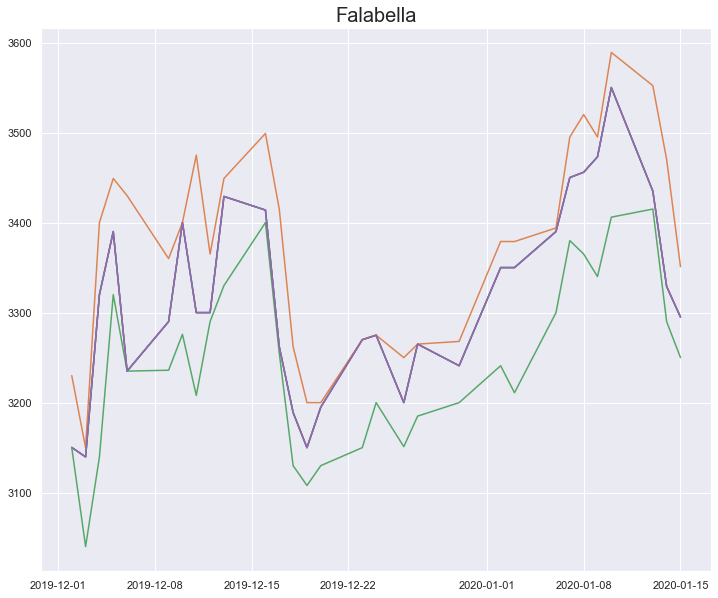

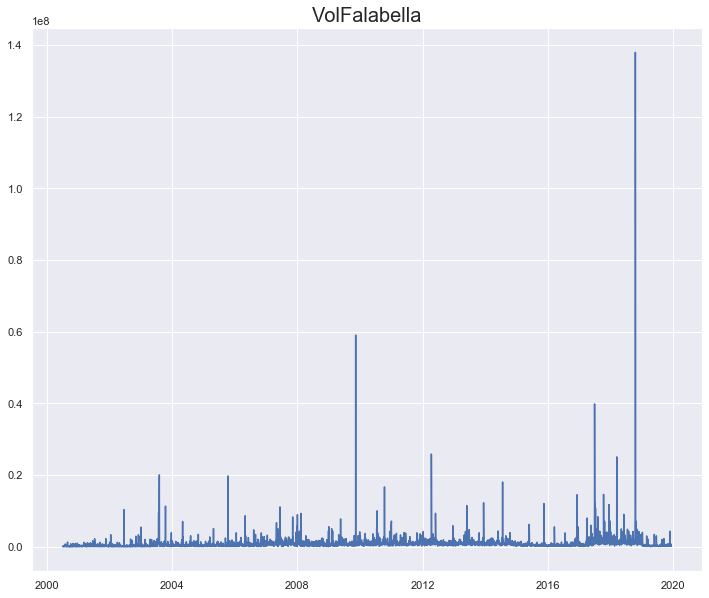

In [125]:
plt.plot(DatosFalabellaNuevo[['Open','High','Low','Close','Adj Close']])
plt.title('Falabella',fontsize=20)
plt.figure()
plt.plot(DatosFalabella['Volume'])
plt.title('VolFalabella',fontsize=20)

In [126]:
import pickle as pkl
modelo = open("lstm_model.h5","rb")
modelo = pkl.load(modelo)

In [127]:
# Base,Batch_size,epochs,lr,time_steps,MinMaxscaler
lstm = LSTMClass(DatosFalabellaNuevo,132,200,0.00001,10,MinMaxScaler())

Error is 0.039303720612149554
[3479.9097 3435.6108 3321.4812 3234.7837 3171.1182 3198.7495 3325.906
 3316.7688 3240.7715 3300.0664 3290.7744 3411.6394 3376.5774 3429.7866
 3490.214  3472.904  3488.2202 3557.481  3436.9048 3382.4622]
[3413.89990234 3262.10009766 3189.         3150.         3195.
 3269.89990234 3274.89990234 3200.         3265.         3241.
 3350.         3350.         3390.         3450.         3455.89990234
 3473.         3550.         3435.         3329.         3295.        ]


,y_pred,y_real
2020-01-02,3290.774414,3350.000000
2020-01-03,3411.639404,3350.000000
2020-01-06,3376.577393,3390.000000
2020-01-07,3429.786621,3450.000000
2020-01-08,3490.214111,3455.899902
2020-01-09,3472.904053,3473.000000
2020-01-10,3488.220215,3550.000000
2020-01-13,3557.480957,3435.000000
2020-01-14,3436.904785,3329.000000
2020-01-15,3382.462158,3295.000000


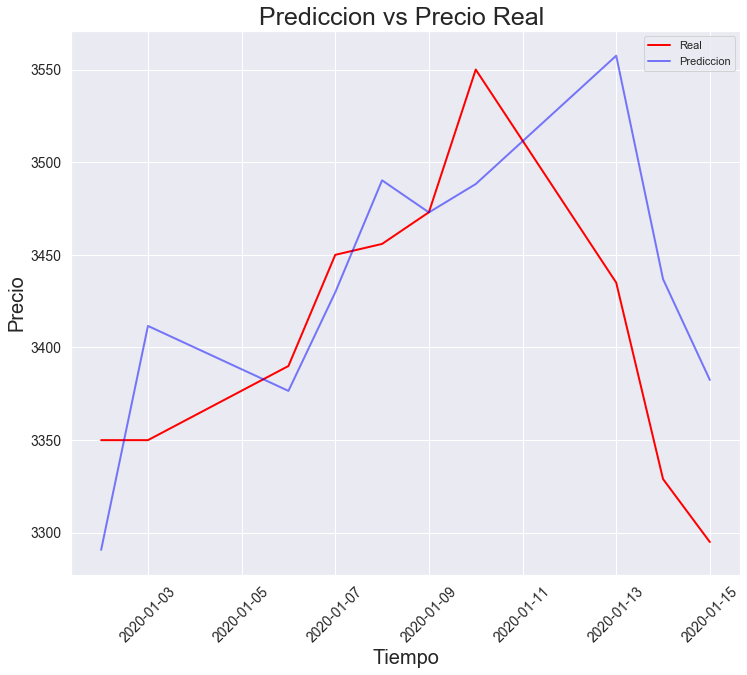

In [128]:
lstm.PredictionNewData(modelo,DatosFalabellaNuevo,
                       ['Open','High','Low','Close','Volume','Adj Close'],
                        5,100)

In [129]:
DatosFalabellaNuevo

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,3150.199951,3230.000000,3150.000000,3150.199951,3150.199951,322827
2019-12-03,3139.699951,3150.000000,3040.100098,3139.699951,3139.699951,266597
2019-12-04,3320.000000,3400.000000,3139.699951,3320.000000,3320.000000,779326
2019-12-05,3390.000000,3449.000000,3320.000000,3390.000000,3390.000000,390694
2019-12-06,3235.000000,3429.899902,3235.000000,3235.000000,3235.000000,319996
2019-12-09,3290.000000,3360.000000,3236.000000,3290.000000,3290.000000,93545
2019-12-10,3400.000000,3400.000000,3275.899902,3400.000000,3400.000000,354700
2019-12-11,3300.000000,3474.899902,3208.000000,3300.000000,3300.000000,590314
2019-12-12,3300.000000,3365.000000,3290.100098,3300.000000,3300.000000,205167
